## Dogs Breed Data Training/Test Preparation

In [48]:
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
%matplotlib inline

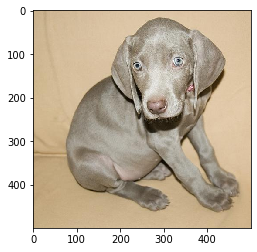

In [49]:
dog_test = cv2.imread('../DogsBreeds/images/images/n02092339-Weimaraner/n02092339_75.jpg')
dog_test = cv2.cvtColor(dog_test,cv2.COLOR_BGR2RGB)
plt.imshow(dog_test)

## Data exploration

In [50]:
classes = os.listdir('../DogsBreeds/images/images/')
print('Dogs breeds:' + str(len(classes)))

Dogs breeds:120


In [51]:
images_by_dog = list()
for i in classes:
    images = os.listdir('../DogsBreeds/images/images/' + i )
    images_by_dog.append(i + ':' + str(len(images)))
images_by_dog

['n02085620-Chihuahua:152',
 'n02085782-Japanese_spaniel:185',
 'n02085936-Maltese_dog:252',
 'n02086079-Pekinese:149',
 'n02086240-Shih-Tzu:214',
 'n02086646-Blenheim_spaniel:188',
 'n02086910-papillon:196',
 'n02087046-toy_terrier:172',
 'n02087394-Rhodesian_ridgeback:172',
 'n02088094-Afghan_hound:239',
 'n02088238-basset:175',
 'n02088364-beagle:195',
 'n02088466-bloodhound:187',
 'n02088632-bluetick:171',
 'n02089078-black-and-tan_coonhound:159',
 'n02089867-Walker_hound:153',
 'n02089973-English_foxhound:157',
 'n02090379-redbone:148',
 'n02090622-borzoi:151',
 'n02090721-Irish_wolfhound:218',
 'n02091032-Italian_greyhound:182',
 'n02091134-whippet:187',
 'n02091244-Ibizan_hound:188',
 'n02091467-Norwegian_elkhound:196',
 'n02091635-otterhound:151',
 'n02091831-Saluki:200',
 'n02092002-Scottish_deerhound:232',
 'n02092339-Weimaraner:160',
 'n02093256-Staffordshire_bullterrier:155',
 'n02093428-American_Staffordshire_terrier:164',
 'n02093647-Bedlington_terrier:182',
 'n02093754-B

### Create training and test data

In [52]:
def create_train_test_dirs(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        train_dir = directory + 'train'
        test_dir = directory + 'test'

        if not os.path.exists(train_dir):
            os.makedirs(train_dir)

        if not os.path.exists(test_dir):
            os.makedirs(test_dir)
    

In [53]:
directory_train = '../DogsBreedsTrainingTestData/'
create_train_test_dirs(directory_train)

### Split data

In [54]:
original_dir = '../DogsBreeds/images/images/'
classes = os.listdir(original_dir)

for i_class in classes:
    images_by_class = os.listdir(original_dir + i_class)
    x_train,x_test = train_test_split(images_by_class, test_size = 0.20)
    #Copy training images to the train dir
    directory_train_breed = '../DogsBreedsTrainingTestData/train/' + i_class 
    directory_test_breed = '../DogsBreedsTrainingTestData/test/' + i_class 
    
    if not os.path.exists(directory_train_breed):
        os.makedirs(directory_train_breed)
        
    if not os.path.exists(directory_test_breed):
        os.makedirs(directory_test_breed)
    
    directory_train_breed += '/'
    directory_test_breed += '/'
    
    for image_train in x_train:
        img_train_dir = original_dir + i_class + '/' + image_train
        dog_train_img = cv2.imread(img_train_dir)
        cv2.imwrite(directory_train_breed + image_train,dog_train_img)
        
    for image_test in x_test:
        img_test_dir = original_dir + i_class + '/' + image_test 
        dog_test_img = cv2.imread(img_test_dir)
        cv2.imwrite(directory_test_breed + image_test,dog_test_img)